In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ROOT
ROOT.gSystem.Load("/Users/guangyongfu/Software/RooUnfold/build/libRooUnfold.dylib")

import pyroounfold
from pyroounfold.toy_unfold import toy_unfold
from pyroounfold.unfold import unfold
from pyroounfold.plotting import *

/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


As an example, we create an artificial variable to play. In practical application, this can be skipped and start from reading in actual ntuples/rootfiles as pandas.dataframe. 

In [2]:
# Gaussian smearing function

df_train = pd.DataFrame(columns=['truth','measured', 'weight'])  # dataframe providing migration matrix, e.g. MC
df_test = pd.DataFrame(columns=['truth','measured', 'weight'])   # dataframe providing distribution to be unfolded, e.g. toy MC, or data as 'measured'


In [3]:
data_mute=np.load("angular_MUTE.npz")
print(data_mute)
sim_true_cos = data_mute['sim_true_cos']
sim_true_cos_SUPL = data_mute['sim_true_cos_SUPL']

NpzFile 'angular_MUTE.npz' with keys: sim_true_cos, sim_true_cos_SUPL


In [4]:
data_sim=np.load("angular_recon_2panels_smeared_nothresholdtrue_75forrecon_mute.npz")
cos_true = data_sim['cos_true']
cos_recon = data_sim['cos_recon']
print(cos_recon)

[0.87015843        nan        nan ...        nan        nan        nan]


In [5]:
data_measure = np.load("measured_angular.npz")
cos_measured = data_measure['var_align_list']

In [6]:
df_train['truth'] = cos_true
df_train['measured'] = cos_recon
df_train['weight'] = 1.

flat_1 = [x for sub in cos_measured[:2] for x in sub]
flat_2 = [x for sub in cos_measured[2:4] for x in sub]  

#df_test['truth'] = cos_measured[0]
df_test['measured'] = flat_1
df_test['weight'] = 1.
  
#df_test['truth'] = cos_recon
#df_test['measured'] = cos_recon
#df_test['weight'] = 1.

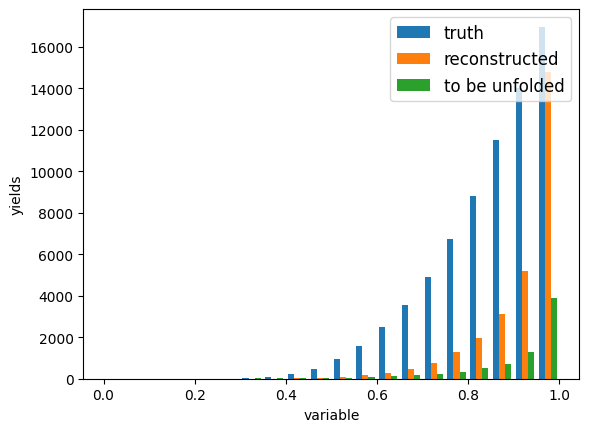

In [7]:
# have a look at the fictional data
my_bins = np.linspace(0,1,21)

plt.hist([df_train['truth'], df_train['measured'], df_test['measured']], 
         label=['truth', 'reconstructed', 'to be unfolded'], bins = my_bins )
plt.xlabel('variable')
plt.ylabel('yields')
plt.legend(loc='upper right', prop={'size':12})
plt.show()
plt.close()

Let's start with the most simple example. No input bin-wise uncertainty or covariance matrix. The default bin error is square root of the bin count.

In [8]:
# define unfold class with all input

example_a = unfold(
    
    df_train = df_train,                     
    weight_train = df_train['weight'], 
    df_test = df_test,                       
    weight_test = df_test['weight'], 
    name_var_true = 'truth', 
    name_var_reco = 'measured',  
    show_var = 'variable',   # just for plotting
    bins = my_bins,
    mc_stat_err = 0
    
    ## optional input
    # reco_bin_error = measured bin-wiese uncertainty
    # reco_cov = measured covariance matrix
    # kcovtoy = if False, error propagation is based on full covariance matrix; 
    #           if True, error propagation is based on internal toys generated by RooUnfold. Default is False. 
    # mc_stat_err = exclude (0) or include (3, default) or only (2) the effect of MC statistics uncertainty on migration matrix evaluated with interal toys.
    )


Now everything needed to launch unfolding is ready !!!

Let's give it a first try, e.g. SVD method with k=0 (default value will be taken by algorithm, i.e. #bins/2)

In [9]:
example_a.do_Svd(2)
    
#example_a.do_Invert()
#example_a.do_BinByBin()

In [10]:
# unfolded result

example_a.result_df

,bin_index,truth_central,truth_stat_error,measured_central,measured_error,unfolded_central,unfolded_error,coverage_perbin
0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,5,0.0,0.0,5.0,2.236068,2.606734,0.101474,0.675890
6,6,0.0,0.0,18.0,4.242641,13.549189,0.512232,0.675636
7,7,0.0,0.0,19.0,4.358899,32.307149,1.177757,0.675300
8,8,0.0,0.0,17.0,4.123106,85.925338,2.995013,0.674845
9,9,0.0,0.0,44.0,6.633250,158.433566,5.225753,0.674241


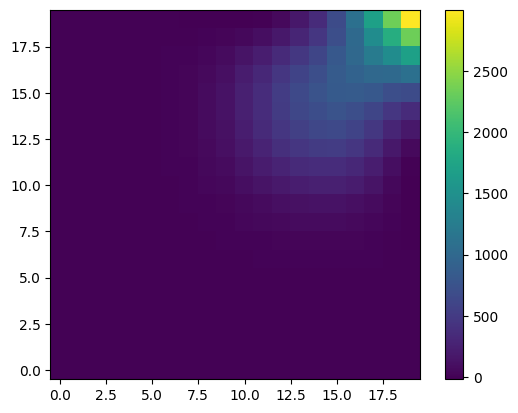

In [11]:
# post-unfold covariance matrix

cov = example_a.result_cov

plt.imshow(cov, origin='lower')
plt.colorbar()
plt.show()

Now we plot the unfolded result comparing with the truth and check the confidence intervals converag, variance and bias for each bin.

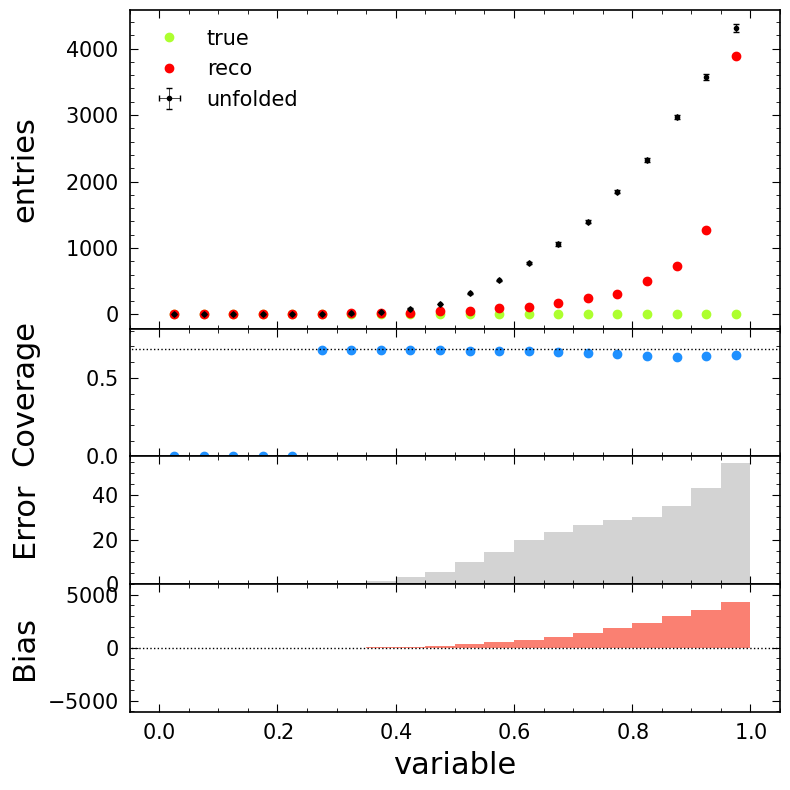

In [12]:
fig = plot_compare_single_run_check(example_a.result_df, my_bins, 'variable', 'entries')

Try other methods..

In [13]:
example_a.do_Svd(10)
unf_cen_svd = example_a.result_df['unfolded_central'].copy()
unf_err_svd = example_a.result_df['unfolded_error'].copy()

example_a.do_Svd(2)
unf_cen_svd_low = example_a.result_df['unfolded_central'].copy()
unf_err_svd_low = example_a.result_df['unfolded_error'].copy()

example_a.do_Invert()
unf_cen_inv = example_a.result_df['unfolded_central'].copy()
unf_err_inv = example_a.result_df['unfolded_error'].copy()

example_a.do_BinByBin()
unf_cen_byb = example_a.result_df['unfolded_central'].copy()
unf_err_byb = example_a.result_df['unfolded_error'].copy()

example_a.do_Bayes(10)
unf_cen_bay = example_a.result_df['unfolded_central'].copy()
unf_err_bay = example_a.result_df['unfolded_error'].copy()

example_a.do_GP()
unf_cen_gp = example_a.result_df['unfolded_central'].copy()
unf_err_gp = example_a.result_df['unfolded_error'].copy()


covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Inverse covariance matrix 100% maximum error
covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Inverse covariance matrix 100% maximum error
Using response matrix priors
Priors:

Vector (20)  is as follows

     |        1  |
------------------
   0 |0 
   1 |0 
   2 |0 
   3 |0 
   4 |0 
   5 |9.66744e-05 
   6 |0.000510993 
   7 |0.00124296 
   8 |0.0033836 
   9 |0.00640813 
  10 |0.0133273 
  11 |0.022028 
  12 |0.0345266 
  13 |0.049373 
  14 |0.0678378 
  15 |0.0932908 
  16 |0.121437 
  17 |0.158643 
  18 |0.193528 
  19 |0.234366 

Now unfolding...
Iteration : 0
Chi^2 of change 1353.41
Iteration : 1
Chi^2 of change 18.2017
Iteration : 2
Chi^2 of change 3.16548
Iteration : 3
Chi^2 of change 1.55569
Iteration : 4
Chi^2 of change 0.918776
Iteration : 5
Chi^2 of change 0.614943
Iteration : 6
Chi^2 of change 0.453956
Iteration : 7
Chi^2 of change 0.361166
Iteration : 8
Chi^2 of change 0.303204
Ite

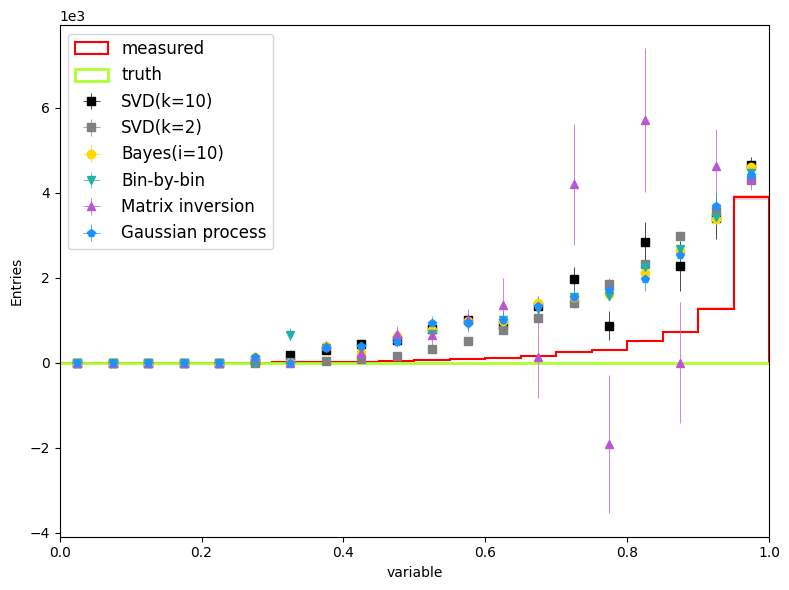

In [14]:
truth_cen = example_a.result_df['truth_central']
measu_cen, measu_err = example_a.result_df['measured_central'], example_a.result_df['measured_error']

f = plt.figure(figsize=(8,6))
plt.hist(get_bin_centers(my_bins), bins=my_bins, weights=measu_cen, histtype='step', lw=1.5, color='red', label='measured')
plt.bar(get_bin_centers(my_bins), height=measu_err*2, width=get_bin_widths(my_bins), bottom=measu_cen - measu_err,
       alpha=0.2, color='red')  

plt.hist(get_bin_centers(my_bins), bins=my_bins, weights=truth_cen, histtype='step', lw=2, color='greenyellow',  label='truth')

plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_svd, yerr=unf_err_svd, xerr=0, marker='s', color='black',ls='', elinewidth=0.5,  label='SVD(k=10)')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_svd_low, yerr=unf_err_svd_low, xerr=0, marker='s', color='gray',ls='', elinewidth=0.5, label='SVD(k=2)')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_bay, yerr=unf_err_bay, xerr=0, marker='o', color='gold',ls='', elinewidth=0.5,  label='Bayes(i=10)')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_byb, yerr=unf_err_byb, xerr=0, marker='v', color='lightseagreen',ls='', elinewidth=0.5,  label='Bin-by-bin')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_inv, yerr=unf_err_inv, xerr=0, marker='^', color='mediumorchid',ls='', elinewidth=0.5,  label='Matrix inversion')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_gp, yerr=unf_err_gp, xerr=0, marker='p', color='dodgerblue',ls='', elinewidth=0.5,  label='Gaussian process')

plt.xlim(0,1)
#plt.ylim(0,3000)
plt.xlabel('variable')
plt.ylabel('Entries')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc=0, prop={'size':12})
plt.tight_layout()
plt.show()
plt.close()
f.savefig('compare_all.pdf')


Some FoM are defined for bias study: 

a -- $\sum_{i}{|b_{i}|}$ 

b -- $\sum_{i}{|b_{i}|/N_{i}^{\text{true}}}$

c -- $\sum_{i}{b_{i}}$ 

d -- $\sqrt{\sum_{i,j}Cov_{i,j}}$

e -- $\sum_{i}{|b_{i}|}/\sqrt{\sum_{i,j}Cov_{i,j}}$ 

f -- $\sqrt{(\sum_{i}{|b_{i}|})^{2} + \sum_{i,j}Cov_{i,j}}$ 

g -- $\sum_{i}{|b_{i}|}/\sqrt{Cov_{i,i}}$ 

h -- confidence interval coverage probability $\Phi(\frac{b_i}{\sigma_i} +1) - \Phi(\frac{b_i}{\sigma_i} -1)$

where $b_{i} = N_{i}^{\text{unfolded}} - N_{i}^{\text{true}}$ is the bias in each bin, and $Cov_{i,j}$ is the obtained post-unfold covariance matrix. $\Phi$ is the normal cumulative distribution function.

In [15]:
# calculate all FOM
example_a.do_Svd(12)
example_a.check_bias()

/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


In [16]:
example_a.bias_h

np.float64(0.5101348266489563)

Use toys to compare the FOM obtained with different unfolding method or parameters. 

Toys can be generated from the input measured covariance matrix or bin error. If none of them are provided, a Poisson distrition based on the statistical error of bin count will be used.

In [17]:
# define toy class

example_toy = toy_unfold(
    
    df_train = df_train,                     
    weight_train = df_train['weight'], 
    df_test = df_test,                       
    weight_test = df_test['weight'], 
    name_var_true = 'truth', 
    name_var_reco = 'measured',  
    show_var = 'variable',   # just for plotting
    bins = my_bins,
    toy_size = 10  # number of toys
)
    
    ## optional input
    # reco_bin_error = measured bin-wiese uncertainty
    # reco_cov = measured covariance matrix
    # kcovtoy = if False, error propagation is based on full covariance matrix; 
    #           if True, error propagation is based on internal toys generated by RooUnfold. Default is False. 
    # mc_stat_err = exclude (0, default) or include (1) or only (2) the effect of MC statistics uncertainty on migration matrix evaluated with interal toys.

Then, we can use different unfolding mothod for the toys. 

In [18]:
# try matirx inversion method
example_toy.do_toyUnfold(method='Invert',
                         get_fom=True  # include the FOM calculation result
                        ) 
inv_cen = example_toy.result_cen_mean
inv_err = example_toy.result_cen_err
inv_fom = example_toy.dict_fom

/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


In [19]:
# try SVD method with scanning various k parameter

k_arr = np.arange(2, example_toy.nbins+1).tolist()

svd_cen, svd_err, svd_coverage, svd_fom = example_toy.do_toyUnfold_scan(method='Svd', para_arr=k_arr, get_fom=True)

Loop in given parameters......
para = 2
para = 3


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 4
para = 5
para = 6


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 7
para = 8
para = 9


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 10
para = 11


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 12


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 13


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 14
para = 15


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 16


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 17
para = 18


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


para = 19
para = 20


/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])
/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


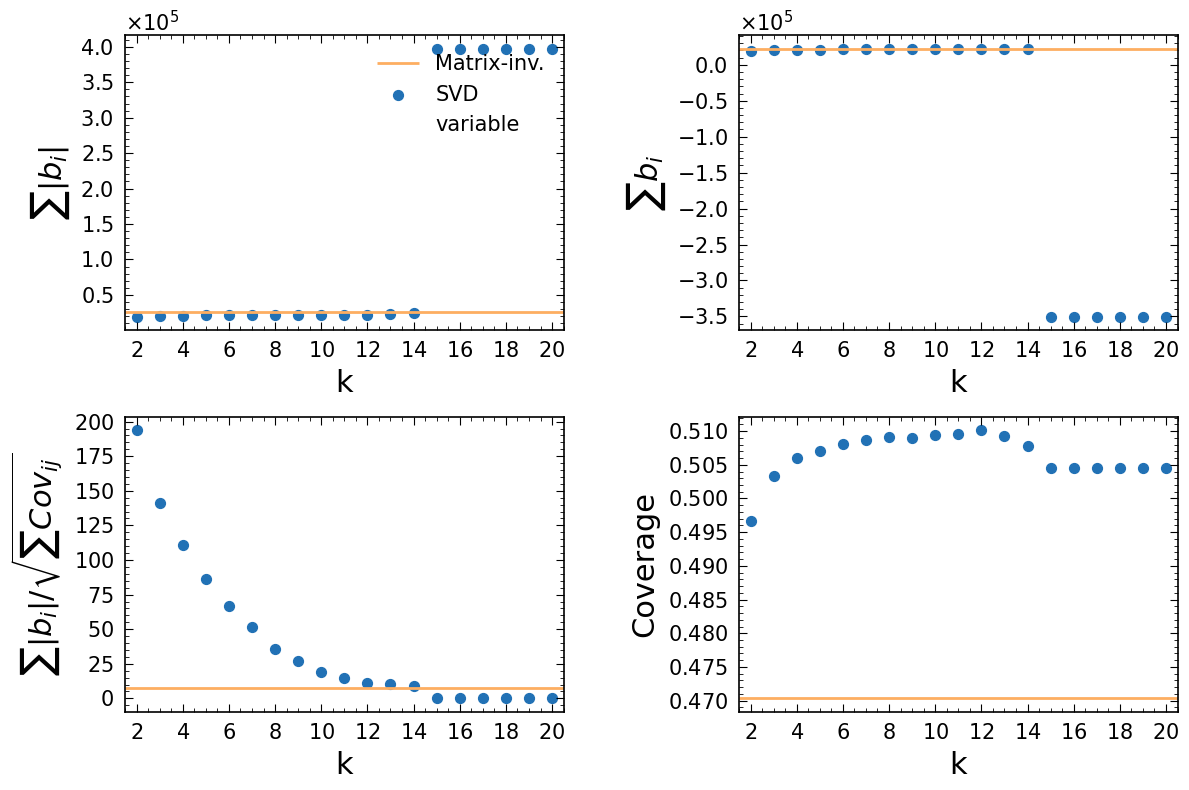

In [20]:
# compare the result
# User can define own plotting function
# Some examples can be found in ./plotting.py

plot_unf_fom_my(k_arr, svd_fom, inv_fom, example_toy.show_var, leg=1) 

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_12906/3707630415.py:5: SyntaxWarning: invalid escape sequence '\s'
  fom_names = ['$\sum_{i}{|b_{i}|}$',
/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_12906/3707630415.py:6: SyntaxWarning: invalid escape sequence '\s'
  '$\sum_{i}{|b_{i}|/N_{i}^{true}}$',
/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_12906/3707630415.py:7: SyntaxWarning: invalid escape sequence '\s'
  '$\sqrt{\sum_{i,j}Cov_{i,j}}$',
/var/folders

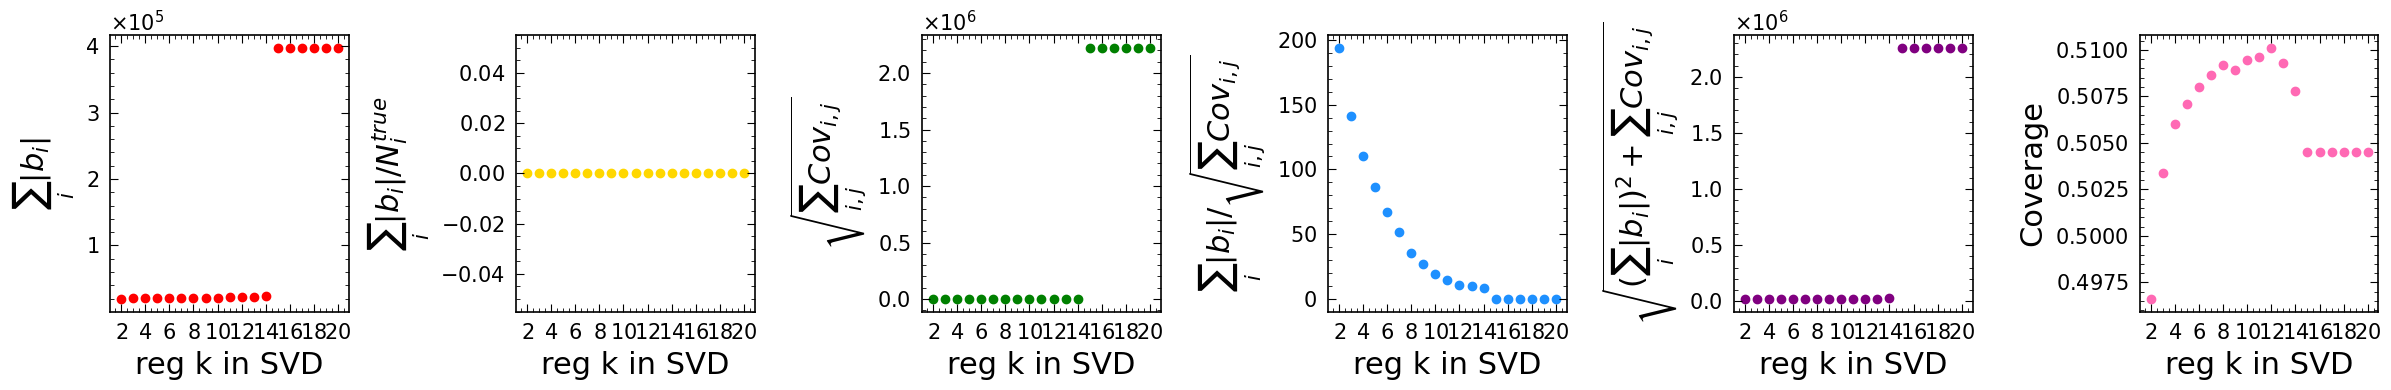

In [21]:
foms    = [svd_fom['fom_a'], svd_fom['fom_b'], svd_fom['fom_d'], svd_fom['fom_e'], svd_fom['fom_f'],svd_fom['fom_h']]

colors    = ['red', 'gold', 'green', 'dodgerblue', 'purple', 'hotpink']

fom_names = ['$\sum_{i}{|b_{i}|}$', 
             '$\sum_{i}{|b_{i}|/N_{i}^{true}}$',
             '$\sqrt{\sum_{i,j}Cov_{i,j}}$',
             '$\sum_{i}{|b_{i}|}/\sqrt{\sum_{i,j}Cov_{i,j}}$', 
             '$\sqrt{(\sum_{i}{|b_{i}|})^{2} + \sum_{i,j}Cov_{i,j}}$', 'Coverage' ]

last_k = 40

# plot until last_k
fig_svd_para = plot_compare_para(len(foms), k_arr, 'reg k in SVD', foms, fom_names, colors, 'variable', last_k)
fig_svd_para.savefig('svd_fom.pdf')

In the reality, it would be better to have a look at the response matrix (migration matrix) before actual unfolding, e.g. to get some feeling to improve the binning, where the guidelines include avoiding low stat. bin and bin_width << resolution.

/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/plotting.py:190: RuntimeWarning: invalid value encountered in divide
  mig_matrix = n_matrix/np.expand_dims(x, axis=0)


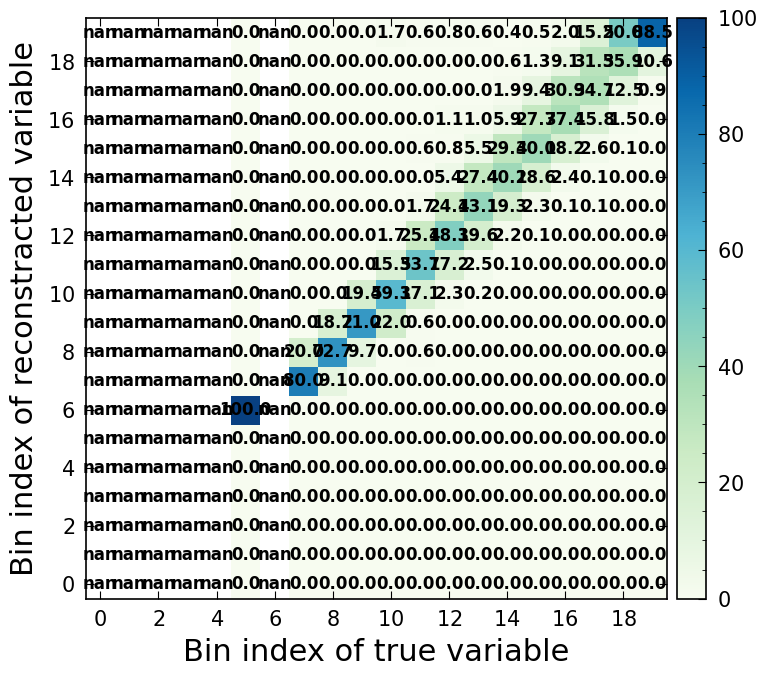

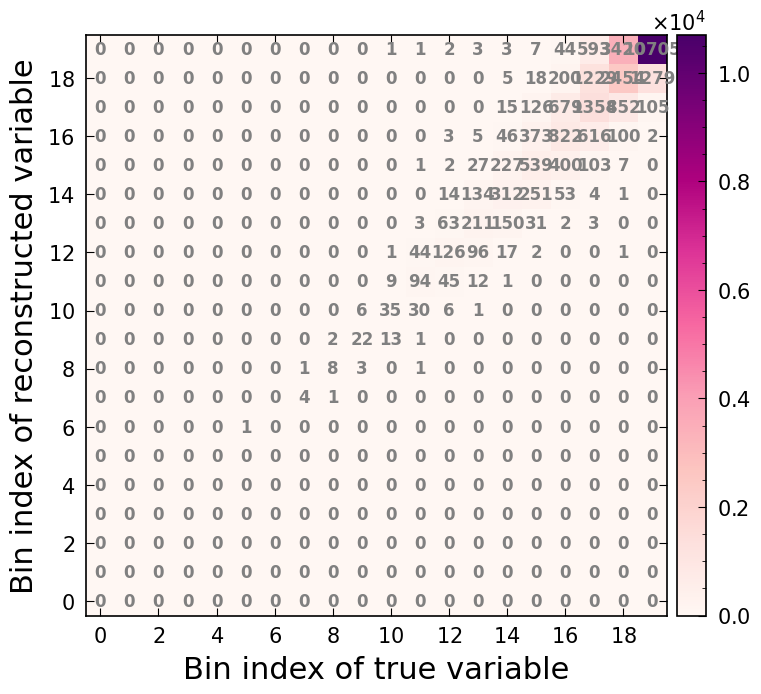

In [22]:
# plot migration matrix and entries matrix

mig_matrix, hist, mig_fig, n_fig = get_migration(
    true_data =df_train['truth'], 
    reco_data =df_train['measured'], 
    weight    =df_train['weight'], 
    bin_var   =np.linspace(0,1,21), 
    name_var  ='variable')

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


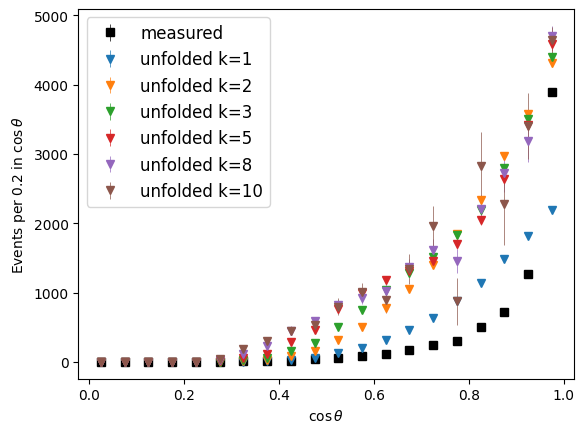

In [23]:
def Angular_intensity(x,h):
    I1= 8.6e-6
    lambda1=0.45
    I2=0.44e-6
    lambda2=0.87
    return  (I1*np.exp(-h/lambda1/x) + I2*np.exp(-h/lambda2/x))/x

def tot_intensity(h):
    I1= 67.97e-6
    lambda1=0.285
    I2=2.071e-6
    lambda2=0.698
    return  I1*np.exp(-h/lambda1) + I2*np.exp(-h/lambda2)

example_a.do_Svd(2)
x=(my_bins[:-1] + my_bins[1:])/2
print(x)
Spec=Angular_intensity(x,2.88)/(2*np.pi*0.01*sum(Angular_intensity(x,2.88)))*tot_intensity(2.88)
#plt.plot(x,Spec/np.trapz(Spec,x)*sum(example_a.result_df['unfolded_central'])*0.05,color="r",ls="-",label="MEI")
plt.errorbar((my_bins[:-1] + my_bins[1:])/2, example_a.result_df['measured_central'],yerr= example_a.result_df['measured_error'],marker='s', color='black',ls='', elinewidth=0.5,label='measured' )

for i in [1,2,3,5,8,10]:
    example_a.do_Svd(i)
    plt.errorbar((my_bins[:-1] + my_bins[1:])/2, example_a.result_df['unfolded_central'],yerr= example_a.result_df['unfolded_error'],marker='v', ls='', elinewidth=0.5,label=f'unfolded k={i}' )

plt.xlabel(r'$\cos\theta$')
plt.ylabel(r'Events per 0.2 in $\cos\theta$')
plt.legend(loc='upper left', prop={'size':12})

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]
0.9750000000000001
2.5196485214884915e-08


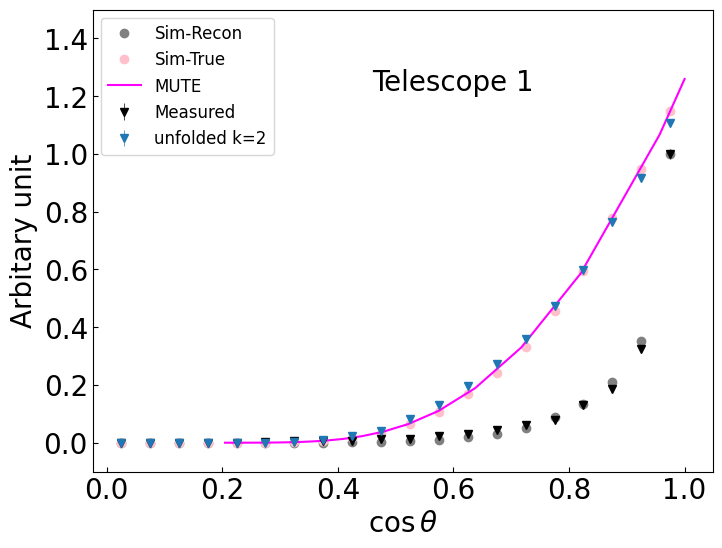

In [24]:
plt.rcParams.update({
    "figure.figsize": (8, 6),     # ~85–90 mm width
    "font.size": 20,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in",
})

example_a.do_Svd(2)

max_measure = max(example_a.result_df['measured_central'])
x=(my_bins[:-1] + my_bins[1:])/2
print(x)
plt.errorbar((my_bins[:-1] + my_bins[1:])/2, example_a.result_df['measured_central']/max_measure,yerr= example_a.result_df['measured_error']/max_measure,marker='v', color='black',ls='', elinewidth=0.5,label='Measured' )
#plt.errorbar((my_bins[:-1] + my_bins[1:])/2, example_a.result_df['unfolded_central']/max_measure,yerr= example_a.result_df['unfolded_error']/max_measure,marker='v',color='red', ls='', elinewidth=0.5,label=f'Unfolded k=2')

counts, edges = np.histogram(df_train['measured'], bins = my_bins)
centers = 0.5*(edges[:-1] + edges[1:])
max_sim = max(counts)
plt.plot(centers, counts/max_sim, 'o',color='grey', label='Sim-Recon')    

counts, edges = np.histogram(df_train['truth'], bins = my_bins)
centers = 0.5*(edges[:-1] + edges[1:])
plt.plot(centers, counts/max_sim, 'o',color='pink', label='Sim-True')    

from scipy.interpolate import interp1d
interp_func = interp1d(sim_true_cos, sim_true_cos_SUPL)
print(centers[-1])
yinterp = interp_func(centers[-1])
print(yinterp)
plt.plot(sim_true_cos, sim_true_cos_SUPL/yinterp*max(counts)/max_sim, label='MUTE', color='magenta')
for i in [2]:
    example_a.do_Svd(i)
    plt.errorbar((my_bins[:-1] + my_bins[1:])/2, example_a.result_df['unfolded_central']/max_measure,yerr= example_a.result_df['unfolded_error']/max_measure,marker='v', ls='', elinewidth=0.5,label=f'unfolded k={i}' )

plt.xlabel(r'$\cos\theta$', fontsize =20)
plt.ylabel(r'Arbitary unit', fontsize=20)
plt.legend(loc='upper left', prop={'size':12})
plt.ylim(-0.1,1.5)
#plt.grid()
#plt.yscale('log')
plt.text(0.6, 1.2, "Telescope 1",
        ha='center', va='bottom', fontsize=20)
plt.savefig('SVD_angular_Telescope1.pdf')

In [25]:
print(interp_func(centers[4:]))

[7.19992304e-13 8.31063353e-12 4.46971528e-11 1.51105084e-10
 3.87631010e-10 8.01529426e-10 1.47594154e-09 2.43624882e-09
 3.80050682e-09 5.59212653e-09 7.65017662e-09 1.03866635e-08
 1.32355835e-08 1.70964016e-08 2.09572197e-08 2.51964852e-08]


In [26]:
example_a.do_Svd(20)
ss = np.sqrt(np.sum(np.square(interp_func(centers[4:])-example_a.result_df['unfolded_central'][4:]/max_measure)))/len(counts[4:])
print(ss)

6.331620828371821
